In [3]:
import time
import datetime
import logging
import os.path
import socket
import json
import sys
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

# import librosa
# import librosa.display

%matplotlib inline

# Set ipython's max row display
pd.set_option('display.max_row', 15)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 15)

In [4]:
%%bash
#pip3 install -r requirements.txt

In [8]:
PRESSSURE_PATH = "data.csv"

In [9]:
df = pd.DataFrame.from_csv(PRESSSURE_PATH, sep=' ', index_col=None)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [10]:
df.datetime = pd.to_datetime(df.datetime, format='%Y-%m-%d-%H:%M')

In [24]:
dima_ = df[:-17]
lida = df.tail(17)
dima = dima_[dima_.datetime.notnull()]
dima['PP'] = dima.SYS - dima.DIA
#dima = dima.head(13)
dima

,datetime,SYS,DIA,pulse,PP
0,2018-04-29 08:57:00,136,92,87,44
1,2018-03-25 08:08:00,119,90,67,29
2,2018-03-25 08:08:00,126,93,66,33
3,2018-03-23 10:45:00,131,92,77,39
4,2018-03-21 11:45:00,123,92,73,31
5,2018-03-21 10:49:00,126,96,80,30
6,2018-03-21 08:55:00,117,89,75,28
...,...,...,...,...,...
52,2018-03-09 23:14:00,125,89,70,36
53,2018-03-09 23:13:00,126,89,69,37


                 SYS        DIA      pulse         PP
datetime                                             
7         122.300000  89.900000  68.300000  32.400000
8         133.000000  91.555556  79.333333  41.444444
9         129.000000  88.000000  85.000000  41.000000
10        129.142857  89.714286  81.142857  39.428571
11        134.666667  90.666667  76.000000  44.000000
12        137.000000  86.500000  76.750000  50.500000
13        131.750000  91.000000  82.250000  40.750000
14        125.000000  86.000000  71.000000  39.000000
15        136.666667  86.000000  84.333333  50.666667
18        120.333333  83.666667  90.333333  36.666667
19        124.000000  91.000000  80.000000  33.000000
20        122.000000  83.000000  79.500000  39.000000
21        132.333333  96.333333  82.000000  36.000000
22        115.500000  86.000000  75.000000  29.500000
23        125.500000  89.000000  69.500000  36.500000


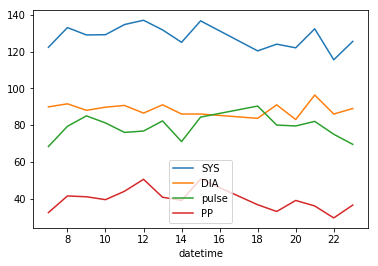

In [25]:
print(dima.groupby(dima['datetime'].dt.hour).mean())
dima.groupby(dima['datetime'].dt.hour).mean().plot()

In [26]:
dima['time'] = dima.datetime.apply(lambda x: x.time())
dima

,datetime,SYS,DIA,pulse,PP,time
0,2018-04-29 08:57:00,136,92,87,44,08:57:00
1,2018-03-25 08:08:00,119,90,67,29,08:08:00
2,2018-03-25 08:08:00,126,93,66,33,08:08:00
3,2018-03-23 10:45:00,131,92,77,39,10:45:00
4,2018-03-21 11:45:00,123,92,73,31,11:45:00
5,2018-03-21 10:49:00,126,96,80,30,10:49:00
6,2018-03-21 08:55:00,117,89,75,28,08:55:00
...,...,...,...,...,...,...
52,2018-03-09 23:14:00,125,89,70,36,23:14:00
53,2018-03-09 23:13:00,126,89,69,37,23:13:00


In [27]:
dima.index = dima.datetime
#dima.asfreq('1H')

In [28]:
by_h = dima.groupby([dima.datetime.dt.to_period('H')]).mean()
by_h.asfreq('D')

,SYS,DIA,pulse,PP
datetime,,,,
2018-03-08,113.000000,77.000000,87.500000,36.0
2018-03-09,122.000000,83.000000,75.000000,39.0
2018-03-09,122.000000,83.000000,79.500000,39.0
2018-03-09,125.500000,89.000000,69.500000,36.5
2018-03-10,127.000000,86.000000,73.000000,41.0
2018-03-11,129.333333,89.333333,91.333333,40.0
2018-03-13,136.000000,90.000000,74.000000,46.0
...,...,...,...,...
2018-03-20,132.333333,96.333333,82.000000,36.0


In [29]:
dima.std(ddof=0), dima.mean()

(SYS      9.024306
 DIA      4.936075
 pulse    8.363956
 PP       9.107863
 dtype: float64, SYS      128.949153
 DIA       89.355932
 pulse     77.898305
 PP        39.593220
 dtype: float64)

In [30]:
dima.DIA.std(ddof=0), dima.SYS.std(ddof=0), 

(4.936075130133138, 9.024305652079532)

In [31]:
dima.DIA.std(ddof=1), dima.SYS.std(ddof=1)

(4.978445650880669, 9.101768923967208)

In [35]:
# dima['DIAr'] = dima.DIA.rolling(window=3).mean()
# dima['SYSr'] = dima.SYS.rolling(window=3).mean()
# dima.plot()

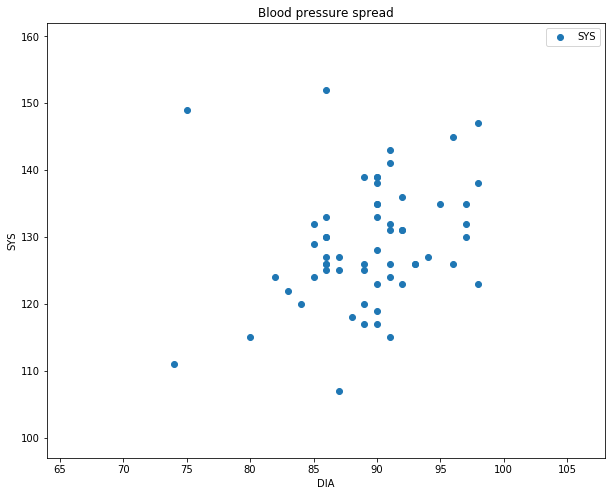

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(dima.DIA, dima.SYS)

plt.title('Blood pressure spread')
plt.xlabel('DIA')
plt.ylabel('SYS')
plt.legend(loc='upper right')
# set the figure boundaries
plt.xlim([min(dima.DIA)-10, max(dima.DIA)+10])
plt.ylim([min(dima.SYS)-10, max(dima.SYS)+10])

plt.show()

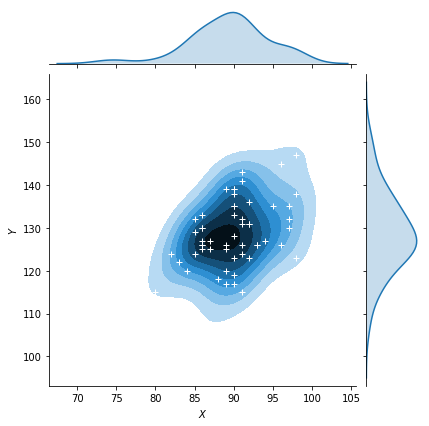

In [34]:
g = sns.jointplot(x="DIA", y="SYS", data=dima, kind="kde")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

<Figure size 720x576 with 0 Axes>

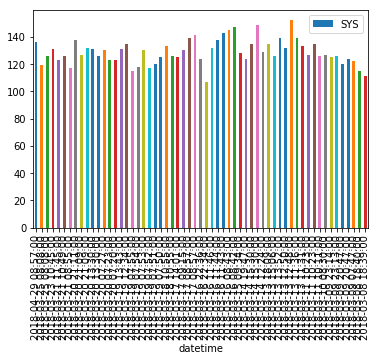

In [36]:
fig = plt.figure(figsize=(10,8))
ax = dima.plot.bar(x='datetime',
              y='SYS', stacked=True, secondary_y='DIA', align='center')
#ax.bar(dima.datetime, dima.SYS, 0.35, bottom=dima.DIA)
#ax.xaxis_date()
plt.show()

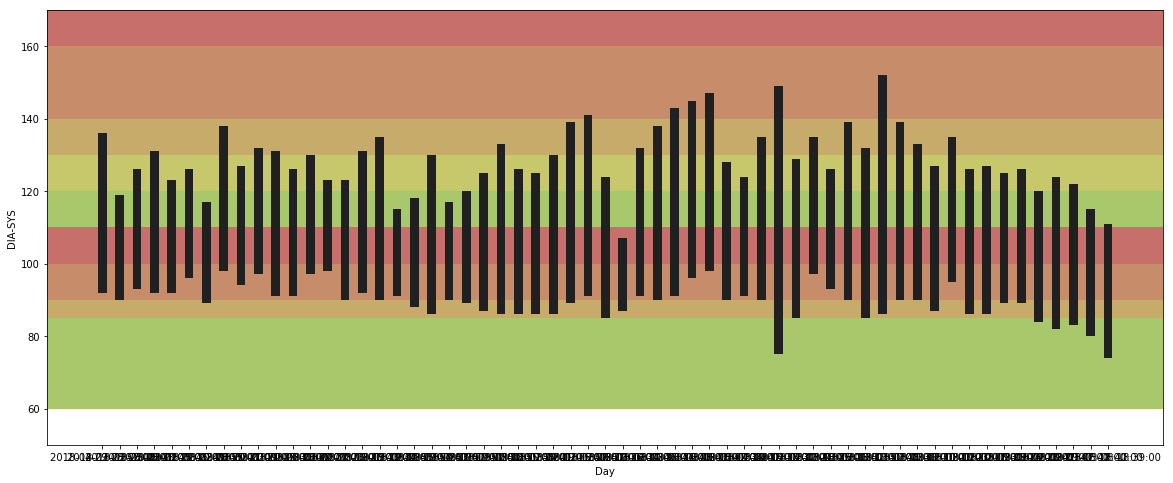

In [37]:
dima_dates = dima.datetime.tolist()
dima_dates_x = range(len(dima_dates))
dima_SYS_height = dima.SYS - dima.DIA

fig = plt.figure(figsize=(20,8))#, dpi=370)
plt.bar(dima_dates_x, 
        height = dima_SYS_height, 
        width = 0.5, 
        bottom = dima.DIA, zorder=2, color='#202020')
plt.grid(visible=False, axis='x')
plt.grid(visible=False, color='#3A2727', axis='y')
plt.xticks(dima_dates_x, dima_dates)
plt.xlabel('Day')
plt.ylabel('DIA-SYS')
#plt.ylim([min(dima.DIA)-10, max(dima.SYS)+10])
plt.ylim(50, 170)

alpha = 1
zorder = 1

colors = ['#2ca02c', '#B2A81F', '#B2731F', '#B24C1F', '#B22F1F', '#B24C1F']
colors2 = sns.color_palette("hls", 19, 0.7).as_hex()[0:5]
colors2.reverse()

# optimal
plt.axhspan(60, 120, facecolor=colors2[0], alpha=alpha, zorder=zorder, fill=True)

# normal
plt.axhspan(120, 130, facecolor=colors2[1], alpha=alpha, zorder=zorder, fill=True)
#plt.axhspan(80, 85, facecolor=colors2[1], alpha=alpha, zorder=zorder, fill=True)

# high normal
plt.axhspan(130, 140, facecolor=colors2[2], alpha=alpha, zorder=zorder, fill=True)
plt.axhspan(85, 90, facecolor=colors2[2], alpha=alpha, zorder=zorder, fill=True)

# Grade 1 hypertension
plt.axhspan(140, 160, facecolor=colors2[3], alpha=alpha, zorder=zorder, fill=True)
plt.axhspan(90, 100, facecolor=colors2[3], alpha=alpha, zorder=zorder, fill=True)

# Grade 2 hypertension
plt.axhspan(160, 180, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)
plt.axhspan(100, 110, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)

# Grade 3 hypertension
plt.axhspan(180, 190, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)
plt.axhspan(110, 110, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)

plt.show()

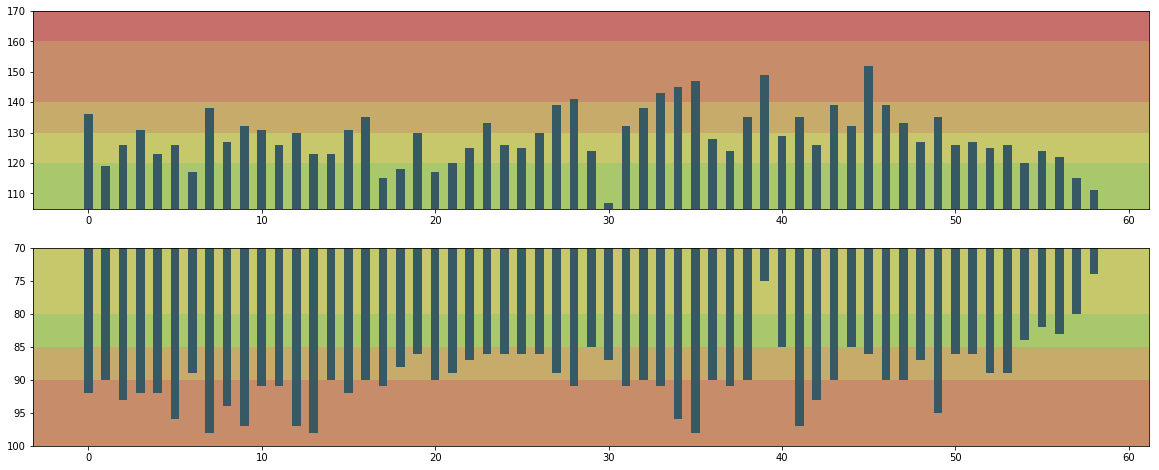

In [38]:
dima_dates = dima.datetime.tolist()
dima_dates_x = range(len(dima_dates))
dima_SYS_height = dima.SYS - dima.DIA

alpha = 1
zorder = 1
colors = ['#2ca02c', '#B2A81F', '#B2731F', '#B24C1F', '#B22F1F', '#B24C1F']
colors_hls = sns.color_palette("hls", 19, 0.7).as_hex()
colors2 = colors_hls[0:5]
colors2.reverse()
#sns.palplot(colors2)
bar_color = sns.set_hls_values(colors_hls[10], s=0.3, l=0.3)

fig, axes = plt.subplots(2, 1, figsize=(20, 8))
#fig = plt.figure(figsize=(20,8))#, dpi=370)
axes[0].bar(dima_dates_x, 
        height = dima.SYS, 
        width = 0.5,         
        zorder=2, 
        color=bar_color)
axes[0].grid(visible=False, axis='x')
axes[0].grid(visible=False, color='#3A2727', axis='y')
#axes[0].xticks(dima_dates_x, dima_dates)
#axes[0].xlabel('Day')
#axes[0].ylabel('DIA-SYS')
#plt.ylim([min(dima.DIA)-10, max(dima.SYS)+10])
axes[0].set_ylim(105, 170)

# optimal
axes[0].axhspan(60, 120, facecolor=colors2[0], alpha=alpha, zorder=zorder, fill=True)
# normal
axes[0].axhspan(120, 130, facecolor=colors2[1], alpha=alpha, zorder=zorder, fill=True)
#plt.axhspan(80, 85, facecolor='#B2A81F', alpha=alpha, zorder=zorder, fill=True)
# high normal
axes[0].axhspan(130, 140, facecolor=colors2[2], alpha=alpha, zorder=zorder, fill=True)
# Grade 1 hypertension
axes[0].axhspan(140, 160, facecolor=colors2[3], alpha=alpha, zorder=zorder, fill=True)
# Grade 2 hypertension
axes[0].axhspan(160, 180, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)
# Grade 3 hypertension
axes[0].axhspan(180, 190, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)


axes[1].bar(dima_dates_x, 
        height = dima.DIA, 
        width = 0.5,         
        zorder=2, 
        color=bar_color)
axes[1].grid(visible=False, axis='x')
#axes[1].grid(visible=True, color='#3A2727', axis='y')
#axes[1].xticks(dima_dates_x, dima_dates)
#axes[1].xlabel('Day')
#axes[1].ylabel('DIA-SYS')
#plt.ylim([min(dima.DIA)-10, max(dima.SYS)+10])
axes[1].set_ylim(100, 70)

# optimal

axes[1].axhspan(60, 120, facecolor=colors2[0], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(70, 80, facecolor=colors2[1], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(85, 90, facecolor=colors2[2], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(90, 100, facecolor=colors2[3], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(100, 110, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(110, 110, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)

plt.show()

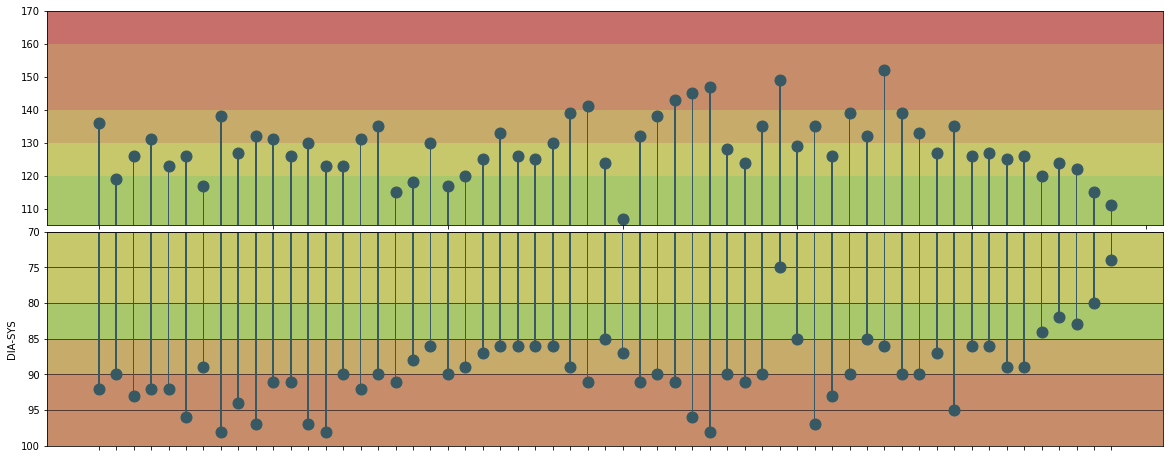

In [39]:
dima_dates = dima.datetime.tolist()
dima_dates_x = range(len(dima_dates))
dima_SYS_height = dima.SYS - dima.DIA

alpha = 1
zorder = 1
colors = ['#2ca02c', '#B2A81F', '#B2731F', '#B24C1F', '#B22F1F', '#B24C1F']
colors_hls = sns.color_palette("hls", 19, 0.7).as_hex()
colors2 = colors_hls[0:5]
colors2.reverse()
#sns.palplot(colors2)
bar_color = sns.set_hls_values(colors_hls[10], s=0.3, l=0.3)

fig, axes = plt.subplots(2, 1, figsize=(20, 8))
plt.subplots_adjust(wspace=0.01, hspace=0.03);

#fig = plt.figure(figsize=(20,8))#, dpi=370)
axes[0].bar(dima_dates_x, 
        height = dima.SYS, 
        width = 0.1,         
        zorder=2, 
        color=bar_color)
axes[0].plot(dima_dates_x, 
        dima.SYS, 
        ".",
        markersize=22,
        zorder=2, 
        color=bar_color)
axes[0].grid(visible=False, axis='x')
axes[0].grid(visible=False, color='#3A2727', axis='y')
plt.xticks(dima_dates_x, [])
# for tick in plt.yaxis.get_major_ticks():
#     tick.label2.set_color('green')
    
#plt.xlabel('Day')
plt.ylabel('DIA-SYS')
#plt.ylim([min(dima.DIA)-10, max(dima.SYS)+10])
axes[0].set_ylim(105, 170)

# optimal
axes[0].axhspan(60, 120, facecolor=colors2[0], alpha=alpha, zorder=zorder, fill=True)
# normal
axes[0].axhspan(120, 130, facecolor=colors2[1], alpha=alpha, zorder=zorder, fill=True)
#plt.axhspan(80, 85, facecolor='#B2A81F', alpha=alpha, zorder=zorder, fill=True)
# high normal
axes[0].axhspan(130, 140, facecolor=colors2[2], alpha=alpha, zorder=zorder, fill=True)
# Grade 1 hypertension
axes[0].axhspan(140, 160, facecolor=colors2[3], alpha=alpha, zorder=zorder, fill=True)
# Grade 2 hypertension
axes[0].axhspan(160, 180, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)
# Grade 3 hypertension
axes[0].axhspan(180, 190, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)


axes[1].bar(dima_dates_x, 
        height = dima.DIA, 
        width = 0.1,         
        zorder=2, 
        color=bar_color)
axes[1].plot(dima_dates_x, 
        dima.DIA, 
        ".",        
        markersize=22,
        zorder=2, 
        color=bar_color)
axes[1].grid(visible=False, axis='x')
plt.grid(visible=True, color='#3A2727', axis='y')
plt.xticks(dima_dates_x, [])
#plt.xlabel('Day')
plt.ylabel('DIA-SYS')
#plt.ylim([min(dima.DIA)-10, max(dima.SYS)+10])
axes[1].set_ylim(100, 70)

# optimal

axes[1].axhspan(60, 120, facecolor=colors2[0], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(70, 80, facecolor=colors2[1], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(85, 90, facecolor=colors2[2], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(90, 100, facecolor=colors2[3], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(100, 110, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)
axes[1].axhspan(110, 110, facecolor=colors2[4], alpha=alpha, zorder=zorder, fill=True)

plt.show()

In [17]:
#dima.SYS.apply(lambda x: x.div(x.mean()))

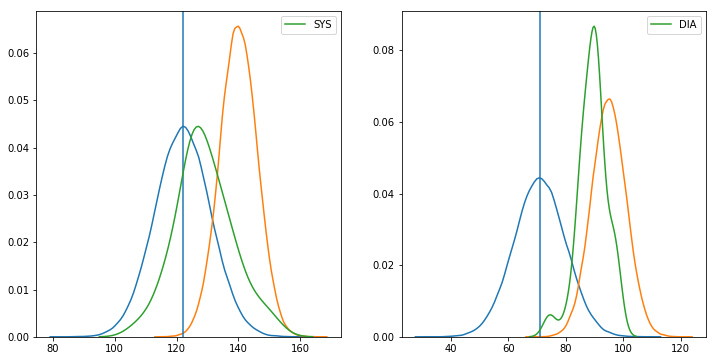

In [40]:
HEALTHY_SYS = 122
HYPER_SYS = 140
HEALTHY_DIA = 71
HYPER_DIA = 95 #?

healthy_sys = sc.stats.norm.rvs(HEALTHY_SYS, 9, size=100000)
hyper_sys = sc.stats.norm.rvs(HYPER_SYS, 6, size=100000)
healthy_dia = sc.stats.norm.rvs(HEALTHY_DIA, 9, size=100000)
hyper_dia = sc.stats.norm.rvs(HYPER_DIA, 6, size=100000)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.kdeplot(healthy_sys, ax=axes[0])
sns.kdeplot(hyper_sys, ax=axes[0])
axes[0].axvline(122)
sns.kdeplot(dima.SYS, ax=axes[0])

sns.kdeplot(healthy_dia, ax=axes[1])
sns.kdeplot(hyper_dia, ax=axes[1])
axes[1].axvline(71)
sns.kdeplot(dima.DIA, ax=axes[1])


In [41]:
# P-value calculation under HEALTY hypothesis
np.sum(healthy_dia >= 80) / len(healthy_dia)

0.1595

In [42]:
# P-value calculation under hypertension hypothesis
np.sum(dima.DIA <= 80) / len(dima.DIA)

0.05084745762711865